In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cancerxx.csv')
df_adults=pd.read_csv('samadult.csv')


In [3]:
df.shape

(33672, 610)

In [4]:
df_adults.shape

(33672, 650)

In [5]:
(df.loc[:, ['HHX', 'FMX', 'FPX']]==df_adults.loc[:, ['HHX', 'FMX', 'FPX']]).mean()

HHX    1.0
FMX    1.0
FPX    1.0
dtype: float64

In [6]:
a=['AGE_P']
c=['R_MARITL', 'REGION', 'PAP6YR1']
df_sel=df[c]
df_sel.loc[:,a]=df_adults[a]

In [7]:
df_sel.isna().sum()

R_MARITL        0
REGION          0
PAP6YR1     17615
AGE_P           0
dtype: int64

In [8]:
mask_female=(df_adults['SEX']==2) # sex is in Adalts file

In [9]:
df_female=df_sel[mask_female]

In [10]:
df_female.shape

(18601, 4)

In [11]:
# number of female 
df_female.shape

(18601, 4)

In [12]:
df_female['PAP6YR1'].isna().sum() # na values

np.int64(2544)

In [13]:
df_female['PAP6YR1'].notna().sum()

np.int64(16057)

In [14]:
# 00-95 
# 97-Refused
# 98-Not ascertained
# 99-Don't know 
notna_mask=((df_female['PAP6YR1']!=97) & (df_female['PAP6YR1']!=98) & (df_female['PAP6YR1']!=99) & df_female['PAP6YR1'].notna())

In [96]:
df_female_clean=df_female[notna_mask]

In [97]:
df_female_clean.shape

(15647, 4)

In [98]:
# 10 var duplicate in both datasets
# predictors
# 'AGE_P','R_MARITL', 'REGION'
pred=['AGE_P','R_MARITL', 'REGION']

Age

In [99]:
df_female_clean['AGE_P'].isna().sum()

np.int64(0)

In [100]:
from sklearn.preprocessing import StandardScaler

# First, check the current distribution
print("AGE_P Summary Statistics:")
print(f"Min: {df_female_clean['AGE_P'].min()}")
print(f"Max: {df_female_clean['AGE_P'].max()}")
print(f"Mean: {df_female_clean['AGE_P'].mean():.2f}")
print(f"Std: {df_female_clean['AGE_P'].std():.2f}")
print(f"Missing values: {df_female_clean['AGE_P'].isna().sum()} ({df_female_clean['AGE_P'].isna().mean()*100:.2f}%)")

# Handle missing values if any
if df_female_clean['AGE_P'].isna().any():
    print("\nWarning: AGE_P has missing values!")
    # Option 1: Fill with median
    age_median = df_female_clean['AGE_P'].median()
    df_female_clean['AGE_P'] = df_female_clean['AGE_P'].fillna(age_median)
    print(f"Filled {df_female_clean['AGE_P'].isna().sum()} missing values with median: {age_median}")

# Standardize using StandardScaler
scaler = StandardScaler()

# Create a new standardized column
df_female_clean['AGE_P_STD'] = scaler.fit_transform(df_female_clean[['AGE_P']])

# Verify the standardization
print("\nAfter Standardization:")
print(f"Mean of AGE_P_STD: {df_female_clean['AGE_P_STD'].mean():.6f} (should be ~0)")
print(f"Std of AGE_P_STD: {df_female_clean['AGE_P_STD'].std():.6f} (should be ~1)")
print(f"Min: {df_female_clean['AGE_P_STD'].min():.2f}")
print(f"Max: {df_female_clean['AGE_P_STD'].max():.2f}")

AGE_P Summary Statistics:
Min: 18
Max: 85
Mean: 51.59
Std: 17.91
Missing values: 0 (0.00%)

After Standardization:
Mean of AGE_P_STD: 0.000000 (should be ~0)
Std of AGE_P_STD: 1.000032 (should be ~1)
Min: -1.88
Max: 1.87


C:\Users\STD_IndTrainee3\AppData\Local\Temp\ipykernel_2172\3783704290.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_clean['AGE_P_STD'] = scaler.fit_transform(df_female_clean[['AGE_P']])


R_MARITL

In [101]:
df_female_clean['R_MARITL'].isna().sum()

np.int64(0)

Code	Marital Status Description
0	Under 14 years
1	Married - spouse in household
2	Married - spouse not in household
3	Married - spouse in household unknown
4	Widowed
5	Divorced
6	Separated
7	Never married
8	Living with partner
9	Unknown marital status

In [102]:
df_female_clean['R_MARITL'].value_counts()

R_MARITL
1    6482
7    2745
5    2533
4    2157
8     904
6     534
2     260
9      32
Name: count, dtype: int64

In [103]:
# Option 1: Detailed categorization (recommended)
marital_mapping = {
    1: 'Married_cohabiting',
    2: 'Married_not_cohabiting',
    3: 'Married_unknown',  # Not in your data but keeping for completeness
    4: 'Widowed',
    5: 'Divorced',
    6: 'Separated',
    7: 'Never_married',
    8: 'Living_with_partner',
    9: 'Unknown'
}

#df_female_clean['MARITAL_DETAILED'] = df_female_clean['R_MARITL'].map(marital_mapping)

# Option 2: Simplified categories for modeling
# Group by similar likely screening patterns
marital_simple_mapping = {
    1: 'Married',  # Spouse in household
    2: 'Married',  # Spouse not in household
    3: 'Married',  # Unknown if in household
    4: 'Widowed',
    5: 'Divorced_Separated',  # Combine divorced and separated
    6: 'Divorced_Separated',
    7: 'Never_married',
    8: 'Cohabiting',  # Living with partner
    9: 'Unknown'
}

df_female_clean['MARITAL_DETAILED']=df_female_clean['R_MARITL'].map(marital_simple_mapping)
df_female_clean['R_MARITL'].map(marital_simple_mapping).value_counts()

C:\Users\STD_IndTrainee3\AppData\Local\Temp\ipykernel_2172\1548994202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_clean['MARITAL_DETAILED']=df_female_clean['R_MARITL'].map(marital_simple_mapping)


R_MARITL
Married               6742
Divorced_Separated    3067
Never_married         2745
Widowed               2157
Cohabiting             904
Unknown                 32
Name: count, dtype: int64

In [104]:
# First, let's check the distribution after mapping
print("Marital Status Distribution (Simplified):")
print(df_female_clean['MARITAL_DETAILED'].value_counts(dropna=False))
print(f"\nTotal: {len(df_female_clean)}")

# Apply one-hot encoding using pandas get_dummies
marital_dummies = pd.get_dummies(
    df_female_clean['MARITAL_DETAILED'], 
    prefix='MARITAL',
    dummy_na=False,  # Don't create a column for NaN (handle separately if needed)
    drop_first=False,
    dtype=int  # Keep all categories for now
)

print(f"\nCreated {len(marital_dummies.columns)} one-hot encoded columns:")
print(marital_dummies.columns.tolist())

# Check sample values
print("\nSample of one-hot encoded data:")
print(marital_dummies.head())

# Add the one-hot encoded columns to your dataframe
df_female_clean = pd.concat([df_female_clean, marital_dummies], axis=1)

# Verify
print(f"\nDataFrame shape after adding dummies: {df_female_clean.shape}")

Marital Status Distribution (Simplified):
MARITAL_DETAILED
Married               6742
Divorced_Separated    3067
Never_married         2745
Widowed               2157
Cohabiting             904
Unknown                 32
Name: count, dtype: int64

Total: 15647

Created 6 one-hot encoded columns:
['MARITAL_Cohabiting', 'MARITAL_Divorced_Separated', 'MARITAL_Married', 'MARITAL_Never_married', 'MARITAL_Unknown', 'MARITAL_Widowed']

Sample of one-hot encoded data:
   MARITAL_Cohabiting  MARITAL_Divorced_Separated  MARITAL_Married  \
1                   0                           0                0   
4                   0                           0                0   
5                   0                           0                1   
6                   0                           0                1   
8                   0                           0                0   

   MARITAL_Never_married  MARITAL_Unknown  MARITAL_Widowed  
1                      1                0            

In [105]:
df_female_clean

,R_MARITL,REGION,PAP6YR1,AGE_P,AGE_P_STD,MARITAL_DETAILED,MARITAL_Cohabiting,MARITAL_Divorced_Separated,MARITAL_Married,MARITAL_Never_married,MARITAL_Unknown,MARITAL_Widowed
1,7,4,3.0,49,-0.144892,Never_married,0,0,0,1,0,0
4,4,1,6.0,66,0.804399,Widowed,0,0,0,0,0,1
5,1,4,6.0,31,-1.150024,Married,0,0,1,0,0,0
6,1,3,4.0,58,0.357673,Married,0,0,1,0,0,0
8,7,1,6.0,46,-0.312414,Never_married,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33659,5,4,6.0,75,1.306964,Divorced_Separated,0,1,0,0,0,0
33660,5,3,1.0,76,1.362805,Divorced_Separated,0,1,0,0,0,0
33661,1,3,3.0,36,-0.870821,Married,0,0,1,0,0,0
33662,8,4,2.0,46,-0.312414,Cohabiting,1,0,0,0,0,0


PAP6YR1 by Marital Status:
                    count      mean       std  median
MARITAL_DETAILED                                     
Never_married        2745  3.747541  3.148073     3.0
Cohabiting            904  3.716814  2.466499     3.0
Unknown                32  3.625000  2.365750     4.0
Married              6742  3.564076  3.158753     3.0
Divorced_Separated   3067  3.379850  4.483807     3.0
Widowed              2157  1.733426  2.414370     1.0


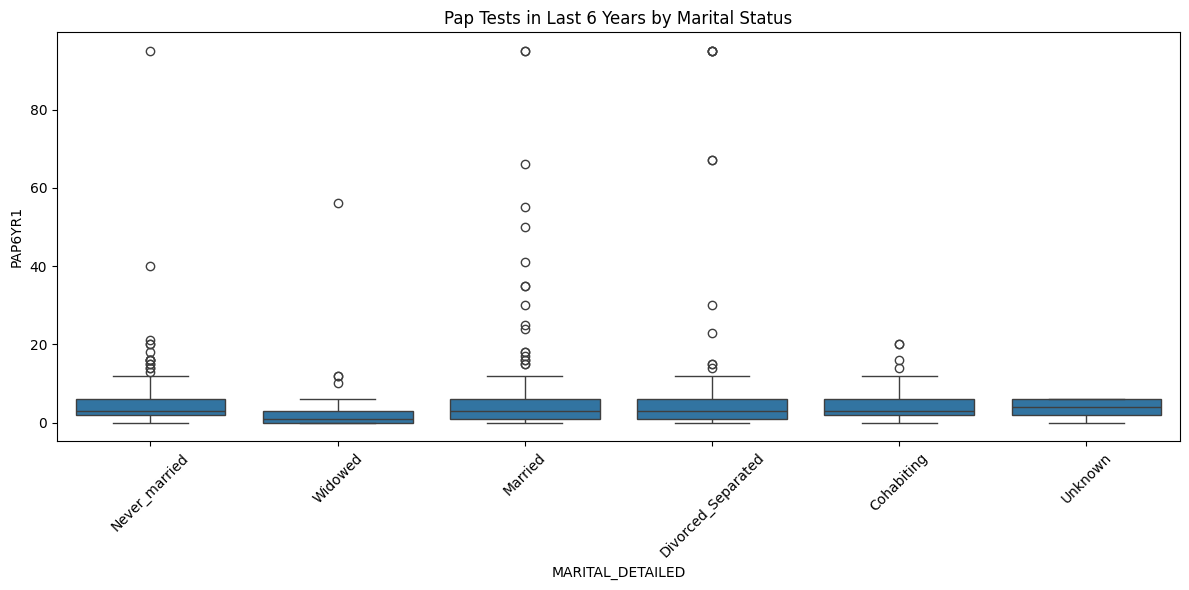

In [106]:
# Check PAP test frequency by marital status
if 'PAP6YR1' in df_female_clean.columns:
    # Mean number of Pap tests by marital status
    pap_by_marital = df_female_clean.groupby('MARITAL_DETAILED')['PAP6YR1'].agg([
        'count', 'mean', 'std', 'median'
    ]).sort_values('mean', ascending=False)
    
    print("PAP6YR1 by Marital Status:")
    print(pap_by_marital)
    
    # Visualize
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_female_clean, x='MARITAL_DETAILED', y='PAP6YR1')
    plt.title('Pap Tests in Last 6 Years by Marital Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

REGION

In [107]:
df_female_clean['REGION'].isna().sum()

np.int64(0)

1. Northeast 2. Midwest 3. South 4. West

In [108]:
df_female_clean['REGION'].value_counts()

REGION
3    5513
4    4270
2    3240
1    2624
Name: count, dtype: int64

In [109]:
#map
region_mapping = {
    1: 'Northeast',
    2: 'Midwest',
    3: 'South',
    4: 'West'
}

df_female_clean['REGION_DETAILED']=df_female_clean['REGION'].map(region_mapping)

In [110]:
# First, let's check the distribution after mapping
print("Marital Status Distribution (Simplified):")
print(df_female_clean['REGION_DETAILED'].value_counts(dropna=False))
print(f"\nTotal: {len(df_female_clean)}")

# Apply one-hot encoding using pandas get_dummies
region_dummies = pd.get_dummies(
    df_female_clean['REGION_DETAILED'], 
    prefix='REGION',
    dummy_na=False,  # Don't create a column for NaN (handle separately if needed)
    drop_first=False,
    dtype=int  # Keep all categories for now
)

print(f"\nCreated {len(region_dummies.columns)} one-hot encoded columns:")
print(region_dummies.columns.tolist())

# Check sample values
print("\nSample of one-hot encoded data:")
print(region_dummies.head())

# Add the one-hot encoded columns to your dataframe
df_female_clean = pd.concat([df_female_clean, region_dummies], axis=1)

# Verify
print(f"\nDataFrame shape after adding dummies: {df_female_clean.shape}")

Marital Status Distribution (Simplified):
REGION_DETAILED
South        5513
West         4270
Midwest      3240
Northeast    2624
Name: count, dtype: int64

Total: 15647

Created 4 one-hot encoded columns:
['REGION_Midwest', 'REGION_Northeast', 'REGION_South', 'REGION_West']

Sample of one-hot encoded data:
   REGION_Midwest  REGION_Northeast  REGION_South  REGION_West
1               0                 0             0            1
4               0                 1             0            0
5               0                 0             0            1
6               0                 0             1            0
8               0                 1             0            0

DataFrame shape after adding dummies: (15647, 17)


In [111]:
df_female_clean

,R_MARITL,REGION,PAP6YR1,AGE_P,AGE_P_STD,MARITAL_DETAILED,MARITAL_Cohabiting,MARITAL_Divorced_Separated,MARITAL_Married,MARITAL_Never_married,MARITAL_Unknown,MARITAL_Widowed,REGION_DETAILED,REGION_Midwest,REGION_Northeast,REGION_South,REGION_West
1,7,4,3.0,49,-0.144892,Never_married,0,0,0,1,0,0,West,0,0,0,1
4,4,1,6.0,66,0.804399,Widowed,0,0,0,0,0,1,Northeast,0,1,0,0
5,1,4,6.0,31,-1.150024,Married,0,0,1,0,0,0,West,0,0,0,1
6,1,3,4.0,58,0.357673,Married,0,0,1,0,0,0,South,0,0,1,0
8,7,1,6.0,46,-0.312414,Never_married,0,0,0,1,0,0,Northeast,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33659,5,4,6.0,75,1.306964,Divorced_Separated,0,1,0,0,0,0,West,0,0,0,1
33660,5,3,1.0,76,1.362805,Divorced_Separated,0,1,0,0,0,0,South,0,0,1,0
33661,1,3,3.0,36,-0.870821,Married,0,0,1,0,0,0,South,0,0,1,0
33662,8,4,2.0,46,-0.312414,Cohabiting,1,0,0,0,0,0,West,0,0,0,1


In [112]:
pred=['AGE_P_STD', 'MARITAL_Cohabiting',	'MARITAL_Divorced_Separated',	'MARITAL_Married',	'MARITAL_Never_married',	'MARITAL_Unknown',	'MARITAL_Widowed',	'REGION_Midwest',	'REGION_Northeast',	'REGION_South',	'REGION_West']


In [113]:
df_female_clean['PAP6YR1'].isna().sum()

np.int64(0)

In [70]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.genmod.generalized_linear_model import SET_USE_BIC_LLF
from scipy.stats import nbinom
import random
import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning

# Import custom modules and functions
from AIC_BIC import calculate_aic_bic

# Import model classes
from models.ZKIHurdlePoisson import ZKHurdlePoisson
from models.ZKIHurdleNB import ZKHurdleNB
from models.ZINB import ZINB_EM, predict_mean as ZINB_pred_mean
from models.ZIP import ZIP_EM, predict_mean as ZIP_pred_mean
from models.ZKINB import ZkINB_EM
from models.ZKIP import ZKIP_EM
from models.ZkICMP import ZkICMP

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import HistGradientBoostingRegressor
from models.ZKHurdleRF import ZKHurdleRF

In [71]:
# warnings.filterwarnings('ignore', module='statsmodels')
warnings.filterwarnings('ignore', category=PerfectSeparationWarning)

class ModelEvaluator:
    """Class to evaluate and compare different count data models."""
    
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.n_train = X_train.shape[0]
        self.results = {}
    
    def evaluate_model(self, model_name, y_pred_test, y_pred_train, llf, k_params):
        """Calculate evaluation metrics for a model."""
        metrics = {
            'mse_test': mean_squared_error(self.y_test, y_pred_test),
            'mae_test': mean_absolute_error(self.y_test, y_pred_test),
            'r2_test': r2_score(self.y_test, y_pred_test),
            'mse_train': mean_squared_error(self.y_train, y_pred_train),
            'mae_train': mean_absolute_error(self.y_train, y_pred_train),
            'r2_train': r2_score(self.y_train, y_pred_train),
            'llf': llf,
            'aic': calculate_aic_bic(self.n_train, llf, k_params)[0],
            'bic': calculate_aic_bic(self.n_train, llf, k_params)[1]
        }
        self.results[model_name] = metrics
        return metrics
    
class ModelEvaluatorML:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.n_train = X_train.shape[0]
        self.results = {}
    
    def evaluate_model(self, model_name, y_pred_test, y_pred_train):
        """Calculate evaluation metrics for a model."""
        metrics = {
            'mse_test': mean_squared_error(self.y_test, y_pred_test),
            'mae_test': mean_absolute_error(self.y_test, y_pred_test),
            'r2_test': r2_score(self.y_test, y_pred_test),
            'mse_train': mean_squared_error(self.y_train, y_pred_train),
            'mae_train': mean_absolute_error(self.y_train, y_pred_train),
            'r2_train': r2_score(self.y_train, y_pred_train)
        }
        self.results[model_name] = metrics
        return metrics

def define_model_parameters():
    """Define parameter counts for different models."""
    return {
        'poisson': 2,
        'negative_binomial': 3,  # if r known (2)
        'zk_hurdle_poisson': 4,  # 2+2
        'zk_hurdle_nb': 5, # 2+2+1 , 1 for alpha
        'zinb': 5,  # if r known (2+2+1)
        'zip': 4,  # 2+2
        'zkinb': 7,  # if r known (2+2+2+1)
        'zkip': 6,  # 2+2+2
        'zkicmp': 7  # 2+2+2+1
    }

def fit_models(X_train, X_test, y_train, y_test, k, alpha):
    # Configuration
    SET_USE_BIC_LLF(True)
    
    # Get parameter counts
    param_counts = define_model_parameters()
    
    # Initialize evaluator
    evaluator = ModelEvaluator(X_train, X_test, y_train, y_test)
    
    # 1. Poisson Model
    #print("Fitting Poisson model...")
    try:
        poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
        poisson_pred = poisson_model.predict(X_test)
        poisson_pred_train = poisson_model.predict(X_train)
        evaluator.evaluate_model(
            'pois', poisson_pred, poisson_pred_train, poisson_model.llf, param_counts['poisson']
        )
    except Exception as e:
        print(e)
    
    # 2. Negative Binomial Model
    #print("Fitting Negative Binomial model...")
    try:
        nb_model = sm.NegativeBinomial(y_train, X_train).fit(disp=0)
        nb_pred = nb_model.predict(X_test)
        nb_pred_train = nb_model.predict(X_train)
        evaluator.evaluate_model(
            'nb', nb_pred, nb_pred_train, nb_model.llf, param_counts['negative_binomial']
        )
    except Exception as e:
        print(e)
    
    # 3. Zero-K Inflated Poisson Hurdle Model
    #print("Fitting Zero-K Inflated Poisson Hurdle model...")
    try:
        zkihurdle_model = ZKHurdlePoisson(k)
        zkihurdle_res = zkihurdle_model.fit(X_train, y_train)
        zkihurdle_ll = zkihurdle_model.loglikelihood(X_train, y_train)
        zkihurdle_pred = zkihurdle_model.predict_mean(X_test)
        zkihurdle_pred_train = zkihurdle_model.predict_mean(X_train)
        evaluator.evaluate_model(
            'zk_h_p', zkihurdle_pred, zkihurdle_pred_train, zkihurdle_ll, param_counts['zk_hurdle_poisson']
        )
    except Exception as e:
        print(e)

    # 5. ZKIHurdleNB Model
    try:
        zkihurdlenb_modle=ZKHurdleNB(k, alpha=alpha)
        zkihurdlenb_modle.fit(X_train, y_train)
        zkihurdlenb_pred=zkihurdlenb_modle.predict_mean(X_test)
        zkihurdlenb_pred_train=zkihurdlenb_modle.predict_mean(X_train)
        zkihurdlenb_ll=zkihurdlenb_modle.loglikelihood(X_train, y_train)
        evaluator.evaluate_model(
            'zk_h_nb', zkihurdlenb_pred, zkihurdlenb_pred_train, zkihurdlenb_ll, param_counts['zk_hurdle_nb']
        )
    except Exception as e:
        print(e)

    # 4. ZINB Model
    #print("Fitting ZINB model...")
    try:
        beta, gamma, zinb_ll = ZINB_EM(y_train.values, X_train.values, X_train.values, alpha=alpha)
        zinb_pred = ZINB_pred_mean(X_test.values, X_test.values, beta, gamma)
        zinb_pred_train = ZINB_pred_mean(X_train.values, X_train.values, beta, gamma)
        evaluator.evaluate_model(
            'zinb', zinb_pred, zinb_pred_train, zinb_ll, param_counts['zinb']
        )
    except Exception as e:
        print(e)
    
    # 5. ZIP Model
    #print("Fitting ZIP model...")
    try:
        beta, gamma, zip_ll = ZIP_EM(y_train.values, X_train.values, X_train.values)
        zip_pred = ZIP_pred_mean(X_test.values, X_test.values, beta, gamma)
        zip_pred_train = ZIP_pred_mean(X_train.values, X_train.values, beta, gamma)   
        evaluator.evaluate_model(
            'zip', zip_pred, zip_pred_train, zip_ll, param_counts['zip']
        )
    except Exception as e:
        print(e)

    # 6. ZKINB Model
    #print("Fitting ZKINB model...")
    try:
        zkinb_model = ZkINB_EM()
        zkinb_res = zkinb_model.fit_em(y_train.values, X_train.values, X_train.values, k)
        zkinb_pred = zkinb_model.predict(X_test.values, X_test.values)
        zkinb_pred_train = zkinb_model.predict(X_train.values, X_train.values)
        evaluator.evaluate_model(
            'zkinb', zkinb_pred, zkinb_pred_train, zkinb_res['final_loglik'], param_counts['zkinb']
        )
    except Exception as e:
        print(e)

    # 7. ZKIP Model
    #print("Fitting ZKIP model...")
    try:
        zkip_model = ZKIP_EM(k_inflated=k)
        zkip_res = zkip_model.fit(X_train.values, y_train.values)
        zkip_pred = zkip_model.predict_expected(X_test.values)
        zkip_pred_train = zkip_model.predict_expected(X_train.values)
        evaluator.evaluate_model(
            'zkip', zkip_pred, zkip_pred_train, zkip_res.final_loglik, param_counts['zkip']
        )
    except Exception as e:
        print(e)

    '''
    # 8. ZkICMP Model
    print("Fitting ZkICMP model...")
    zkicmp_model = ZkICMP(k=k)
    zkicmp_res = zkicmp_model.fit(X_train.values, y_train.values)
    pred_results = zkicmp_model.predict(X_test.values)
    _, _, zkicmp_pred, _ = pred_results
    evaluator.evaluate_model(
        'zkicmp', zkicmp_pred, -zkicmp_res.final_loglik, param_counts['zkicmp']
    )
    '''
    
    results = {}
    for model_name, metrics in evaluator.results.items():
        results[f'{model_name.upper()}_MSE_test'] = metrics['mse_test']
        results[f'{model_name.upper()}_MAE_test'] = metrics['mae_test']
        results[f'{model_name.upper()}_R2_test'] = metrics['r2_test']
        results[f'{model_name.upper()}_MSE_train'] = metrics['mse_train']
        results[f'{model_name.upper()}_MAE_train'] = metrics['mae_train']
        results[f'{model_name.upper()}_R2_train'] = metrics['r2_train']
        results[f'{model_name.upper()}_LLF'] = metrics['llf']
        results[f'{model_name.upper()}_AIC'] = metrics['aic']
        results[f'{model_name.upper()}_BIC'] = metrics['bic']
    
    return results

def fit_ML_models(X_train, X_test, y_train, y_test, k):
    # Initialize evaluator
    evaluator = ModelEvaluatorML(X_train, X_test, y_train, y_test)


    # RandomForestRegressor
    try:
        rf = RandomForestRegressor(
                n_estimators=300,
                criterion="poisson",
                min_samples_leaf=20,
                n_jobs=-1,
                random_state=42
            )
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        y_pred_train_rf = rf.predict(X_train)
        evaluator. evaluate_model('RF', y_pred_rf, y_pred_train_rf)
    except Exception as e:
        print(e)
    
    # HistGradientBoostingRegressor with Poisson loss
    try:
        poisson_GB = HistGradientBoostingRegressor(
                    loss='poisson',        # This is the key - uses Poisson likelihood
                    random_state=42,
                    max_iter=100,
                    learning_rate=0.1,
                    max_depth=6,
                    min_samples_leaf=20    # Good for count data to prevent overfitting
                )
        poisson_GB.fit(X_train, y_train)
        y_pred_gb = poisson_GB.predict(X_test)
        y_pred_train_gb = poisson_GB.predict(X_train)
        evaluator. evaluate_model('GB', y_pred_gb, y_pred_train_gb)
    except Exception as e:
        print(e)

    # ZKHurdleRF
    #try:
    #    zk_h_rf = ZKHurdleRF(k=k)
    #    zk_h_rf.fit(X_train, y_train)
    #    y_pred_zkh_rf = zk_h_rf.predict_mean(X_test)
    #    y_pred_train_zkh_rf = zk_h_rf.predict_mean(X_train)
    #    evaluator.evaluate_model('zk_h_rf', y_pred_zkh_rf, y_pred_train_zkh_rf)
    #except Exception as e:
    #    print(e)

    results = {}
    for model_name, metrics in evaluator.results.items():
        results[f'{model_name.upper()}_MSE_test'] = metrics['mse_test']
        results[f'{model_name.upper()}_MAE_test'] = metrics['mae_test']
        results[f'{model_name.upper()}_R2_test'] = metrics['r2_test']
        results[f'{model_name.upper()}_MSE_train'] = metrics['mse_train']
        results[f'{model_name.upper()}_MAE_train'] = metrics['mae_train']
        results[f'{model_name.upper()}_R2_train'] = metrics['r2_train']
    
    return results

def check_for_nan(X_train, X_test, y_train, y_test):
    """Check for NaN values in data."""
    checks = {
        'X_train_nan': np.any(np.isnan(X_train.values)),
        'X_test_nan': np.any(np.isnan(X_test.values)),
        'y_train_nan': np.any(np.isnan(y_train.values)),
        'y_test_nan': np.any(np.isnan(y_test.values)),
        'X_train_inf': np.any(np.isinf(X_train.values)),
        'y_train_inf': np.any(np.isinf(y_train.values))
    }
    return checks

def main(X, y, rep, gen_m):
    n=X.shape[0]
    k=6
    test_size=0.3
    # Split data indexes
    train_ind, test_ind = train_test_split(
        np.arange(0, n), 
        test_size=test_size, random_state=42
    )

    results = []
    results_r2_minus = []
    problmatic_para = []
    err=[]
    random.seed(42)
    for replication in range(0, rep):
                    X = X
                    y_target = y
                        
                    # Add intercept
                    X = sm.add_constant(X)
                    X = pd.DataFrame(X, columns=['intercept', 'x'])
                    y_target = pd.Series(y_target, name='y')
                        
                    X_train = X.iloc[train_ind, :]
                    X_test = X.iloc[test_ind, :]
                    y_train = y_target.iloc[train_ind]
                    y_test = y_target.iloc[test_ind]

                    p_0 = (y_train == 0).mean()
                    p_k = (y_train == k).mean()
                    p_p = max(1 - p_0 - p_k, 0)
                    # Calculate statistics
                    y_mean = y_train.mean()
                    y_std = y_train.std()
                    n_unique = len(pd.Series(y_train).value_counts())
                    
                    checks = check_for_nan(X_train, X_test, y_train, y_test)
                    if any(checks.values()):
                        print(f"NaN/Inf found: {checks}")
                        print(f"y_mean: {y_mean}, y_std: {y_std}")
                        print(f"y_std^2 - y_mean: {y_std**2 - y_mean}")
                        continue  

                    if not min(p_0, p_k, p_p) >= 0.01:
                        problmatic_para.append({
                                'p_0': p_0,
                                'p_k': p_k,
                                'p_p': p_p,
                                'y_mean': y_mean,
                                'y_std': y_std,
                                'n_unique': n_unique
                            })
                                    
                    else:
                        # Estimate r for negative binomial
                        if y_std**2 > y_mean:
                            r_hat = y_mean**2 / max(y_std**2 - y_mean, 1e-9)
                            p0_nb = nbinom.pmf(0, r_hat, r_hat/(r_hat + y_mean))
                            pk_nb = nbinom.pmf(k, r_hat, r_hat/(r_hat + y_mean))
                            zero_inflated = p_0 > p0_nb 
                            k_inflated = p_k > pk_nb 
                            # Fit models
                            try:
                                model_results = fit_models(X_train, X_test, y_train, y_test, k, 1/r_hat)
                                ml_model_results=fit_ML_models(X_train, X_test, y_train, y_test, k)
                                results.append({
                                            'p_0': p_0,
                                            'p_k': p_k,
                                            'p_p': p_p,
                                            'y_mean': y_mean,
                                            'y_std': y_std,
                                            'n_unique': n_unique,
                                            'r_hat': r_hat,
                                            'p0_nb': p0_nb,
                                            'pk_nb': pk_nb,
                                            'zero_inflated': zero_inflated,
                                            'k_inflated': k_inflated,
                                    } | model_results
                                      | ml_model_results)
                            except Exception as e:
                                print(e)
                                err.append({
                                    'p_0': p_0,
                                    'p_k': p_k,
                                    'p_p': p_p,
                                    'y_mean': y_mean,
                                    'y_std': y_std,
                                    'n_unique': n_unique
                                })
                        else:
                            r_hat = np.nan
                            p0_nb = np.nan
                            pk_nb = np.nan
                            results_r2_minus.append({
                                            'p_0': p_0,
                                            'p_k': p_k,
                                            'p_p': p_p,
                                            'y_mean': y_mean,
                                            'y_std': y_std,
                                            'n_unique': n_unique,
                                        })
        
    return pd.DataFrame(results), pd.DataFrame(results_r2_minus), pd.DataFrame(problmatic_para), pd.DataFrame(err)

#if __name__ == "__main__":
#    results_H, results_r2_minus_H, problmatic_para_H, err= main(300, 10)

In [24]:
df_female_clean.shape[0]

15647

In [82]:
def one_fold(X, y, train_ind, test_ind, results, results_r2_minus, problmatic_para, err):
        y_target = y
            
        # Add intercept
        X = sm.add_constant(X)
        X = pd.DataFrame(X)
        y_target = pd.Series(y_target, name='y')
        print(X.isna().sum())
        print(y.isna().sum())    
    
        X_train = X.iloc[train_ind, :]
        X_test = X.iloc[test_ind, :]
        y_train = y_target.iloc[train_ind]
        y_test = y_target.iloc[test_ind]

        p_0 = (y_train == 0).mean()
        p_k = (y_train == k).mean()
        p_p = max(1 - p_0 - p_k, 0)
        # Calculate statistics
        y_mean = y_train.mean()
        y_std = y_train.std()
        n_unique = len(pd.Series(y_train).value_counts())
        '''
        checks = check_for_nan(X_train, X_test, y_train, y_test)
        if any(checks.values()):
            print(f"NaN/Inf found: {checks}")
            print(f"y_mean: {y_mean}, y_std: {y_std}")
            print(f"y_std^2 - y_mean: {y_std**2 - y_mean}")
        '''   

        if not min(p_0, p_k, p_p) >= 0.01:
            problmatic_para.append({
                    'p_0': p_0,
                    'p_k': p_k,
                    'p_p': p_p,
                    'y_mean': y_mean,
                    'y_std': y_std,
                    'n_unique': n_unique
                })
                        
        else:
            # Estimate r for negative binomial
            if y_std**2 > y_mean:
                r_hat = y_mean**2 / max(y_std**2 - y_mean, 1e-9)
                p0_nb = nbinom.pmf(0, r_hat, r_hat/(r_hat + y_mean))
                pk_nb = nbinom.pmf(k, r_hat, r_hat/(r_hat + y_mean))
                zero_inflated = p_0 > p0_nb 
                k_inflated = p_k > pk_nb 
                # Fit models
                try:
                    model_results = fit_models(X_train, X_test, y_train, y_test, k, 1/r_hat)
                    ml_model_results = fit_ML_models(X_train, X_test, y_train, y_test, k)
                    results.append({
                                'p_0': p_0,
                                'p_k': p_k,
                                'p_p': p_p,
                                'y_mean': y_mean,
                                'y_std': y_std,
                                'n_unique': n_unique,
                                'r_hat': r_hat,
                                'p0_nb': p0_nb,
                                'pk_nb': pk_nb,
                                'zero_inflated': zero_inflated,
                                'k_inflated': k_inflated
                        } | model_results
                          | ml_model_results)
                except Exception as e:
                    print(f"Error {e}")
                    err.append({
                        'p_0': p_0,
                        'p_k': p_k,
                        'p_p': p_p,
                        'y_mean': y_mean,
                        'y_std': y_std,
                        'n_unique': n_unique
                    })
            else:
                r_hat = np.nan
                p0_nb = np.nan
                pk_nb = np.nan
                results_r2_minus.append({
                                'p_0': p_0,
                                'p_k': p_k,
                                'p_p': p_p,
                                'y_mean': y_mean,
                                'y_std': y_std,
                                'n_unique': n_unique
                            })
    
        return results, results_r2_minus, problmatic_para, err

In [85]:
df_female_clean[pred] = df_female_clean[pred].astype(float)

ValueError: could not convert string to float: 'West'

In [114]:
df_female_clean[pred].isna().sum()

AGE_P_STD                     0
MARITAL_Cohabiting            0
MARITAL_Divorced_Separated    0
MARITAL_Married               0
MARITAL_Never_married         0
MARITAL_Unknown               0
MARITAL_Widowed               0
REGION_Midwest                0
REGION_Northeast              0
REGION_South                  0
REGION_West                   0
dtype: int64

In [115]:
import numpy as np
import random
from sklearn.model_selection import KFold

# Reproducibility
random.seed(42)
np.random.seed(42)

X = df_female_clean[pred]
y = df_female_clean['PAP6YR1']

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

results = []
results_r2_minus = []
problmatic_para = []
err = []

for fold_id, (train_ind, test_ind) in enumerate(kf.split(X), start=1):
    print(f"Running fold {fold_id}")

    results, results_r2_minus, problmatic_para, err = one_fold(
        X, y,
        train_ind, test_ind,
        results, results_r2_minus,
        problmatic_para, err
    )



Running fold 1
const                         0
AGE_P_STD                     0
MARITAL_Cohabiting            0
MARITAL_Divorced_Separated    0
MARITAL_Married               0
MARITAL_Never_married         0
MARITAL_Unknown               0
MARITAL_Widowed               0
REGION_Midwest                0
REGION_Northeast              0
REGION_South                  0
REGION_West                   0
dtype: int64
0


c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Singular matrix
Singular matrix
Running fold 2
const                         0
AGE_P_STD                     0
MARITAL_Cohabiting            0
MARITAL_Divorced_Separated    0
MARITAL_Married               0
MARITAL_Never_married         0
MARITAL_Unknown               0
MARITAL_Widowed               0
REGION_Midwest                0
REGION_Northeast              0
REGION_South                  0
REGION_West                   0
dtype: int64
0


c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Singular matrix
Singular matrix
Running fold 3
const                         0
AGE_P_STD                     0
MARITAL_Cohabiting            0
MARITAL_Divorced_Separated    0
MARITAL_Married               0
MARITAL_Never_married         0
MARITAL_Unknown               0
MARITAL_Widowed               0
REGION_Midwest                0
REGION_Northeast              0
REGION_South                  0
REGION_West                   0
dtype: int64
0
Singular matrix


c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Singular matrix
Singular matrix
Running fold 4
const                         0
AGE_P_STD                     0
MARITAL_Cohabiting            0
MARITAL_Divorced_Separated    0
MARITAL_Married               0
MARITAL_Never_married         0
MARITAL_Unknown               0
MARITAL_Widowed               0
REGION_Midwest                0
REGION_Northeast              0
REGION_South                  0
REGION_West                   0
dtype: int64
0


c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Singular matrix
Singular matrix
Running fold 5
const                         0
AGE_P_STD                     0
MARITAL_Cohabiting            0
MARITAL_Divorced_Separated    0
MARITAL_Married               0
MARITAL_Never_married         0
MARITAL_Unknown               0
MARITAL_Widowed               0
REGION_Midwest                0
REGION_Northeast              0
REGION_South                  0
REGION_West                   0
dtype: int64
0


c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STD_IndTrainee3\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Singular matrix
Singular matrix


In [116]:
results_df=pd.DataFrame(results)

In [134]:
lo=results_df.columns.values

In [135]:
lo[results_df.isna().sum()>0]

array(['NB_MSE_test', 'NB_MAE_test', 'NB_R2_test', 'NB_MSE_train',
       'NB_MAE_train', 'NB_R2_train', 'NB_LLF', 'NB_AIC', 'NB_BIC'],
      dtype=object)

In [ ]:
r2_train=['POIS_R2_train', 'NB_R2_train', 'ZK_H_P_R2_train', 'ZK_H_NB_R2_train', 'ZINB_R2_train', 'ZIP_R2_train', 'ZKINB_R2_train', 'ZKIP_R2_train', 'RF_R2_train', 'GB_R2_train']
r2=['POIS_R2_test', 'NB_R2_test', 'ZK_H_P_R2_test', 'ZK_H_NB_R2_test', 'ZINB_R2_test', 'ZIP_R2_test', 'ZKINB_R2_test', 'ZKIP_R2_test', 'RF_R2_test', 'GB_R2_test']
AIC=['POIS_AIC', 'NB_AIC', 'ZK_H_P_AIC', 'ZK_H_NB_AIC', 'ZINB_AIC', 'ZIP_AIC', 'ZKINB_AIC', 'ZKIP_AIC']
mse=['POIS_MSE_test', 'NB_MSE_test', 'ZK_H_P_MSE_test', 'ZK_H_NB_MSE_test', 'ZINB_MSE_test', 'ZIP_MSE_test', 'ZKINB_MSE_test', 'ZKIP_MSE_test', 'RF_MSE_test', 'GB_MSE_test']
mae_train=['POIS_MAE_train', 'NB_MAE_train', 'ZK_H_P_MAE_train', 'ZK_H_NB_MAE_train', 'ZINB_MAE_train', 'ZIP_MAE_train', 'ZKINB_MAE_train', 'ZKIP_MAE_train', 'RF_MAE_train', 'GB_MAE_train']
mae=['POIS_MAE_test', 'NB_MAE_test', 'ZK_H_P_MAE_test', 'ZK_H_NB_MAE_test', 'ZINB_MAE_test', 'ZIP_MAE_test', 'ZKINB_MAE_test', 'ZKIP_MAE_test', 'RF_MAE_test', 'GB_MAE_test']


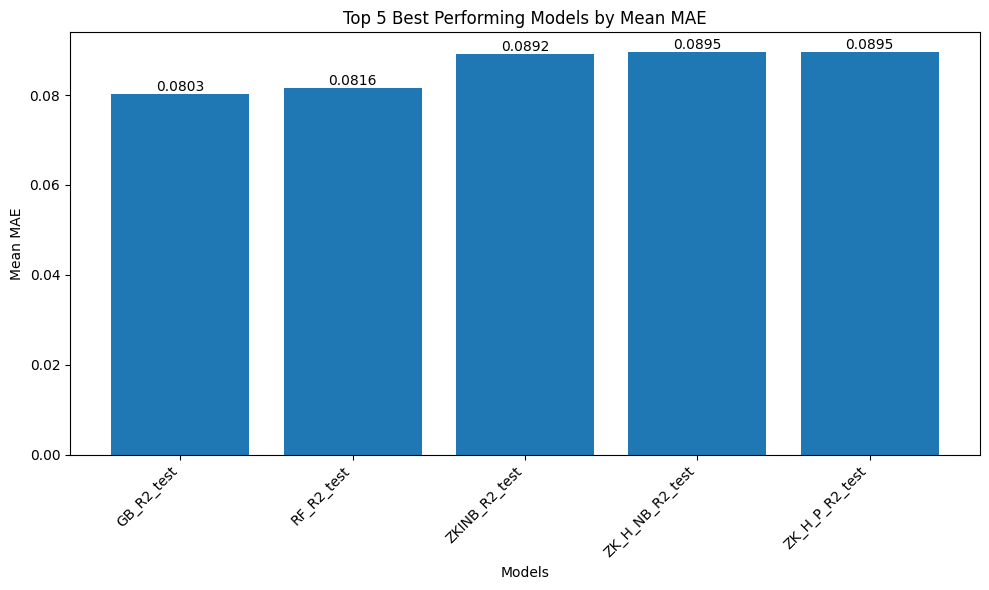

Top 5 models (lowest MAE):
GB_R2_test         0.080324
RF_R2_test         0.081632
ZKINB_R2_test      0.089157
ZK_H_NB_R2_test    0.089466
ZK_H_P_R2_test     0.089474
dtype: float64


In [139]:
import matplotlib.pyplot as plt

# Sort the mean MAE values (ascending order since lower MAE is better)
sorted_means = results_df[r2].mean().sort_values()

# Get the top 5 best (lowest MAE) models
top_5 = sorted_means.tail(5)

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5.index, top_5.values)
plt.xlabel('Models')
plt.ylabel('Mean MAE')
plt.title('Top 5 Best Performing Models by Mean MAE')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Optional: Print the sorted results
print("Top 5 models (lowest MAE):")
print(top_5)

DataFrame columns:
['p_0', 'p_k', 'p_p', 'y_mean', 'y_std', 'n_unique', 'r_hat', 'p0_nb', 'pk_nb', 'zero_inflated', 'k_inflated', 'POIS_MSE_test', 'POIS_MAE_test', 'POIS_R2_test', 'POIS_MSE_train', 'POIS_MAE_train', 'POIS_R2_train', 'POIS_LLF', 'POIS_AIC', 'POIS_BIC', 'NB_MSE_test', 'NB_MAE_test', 'NB_R2_test', 'NB_MSE_train', 'NB_MAE_train', 'NB_R2_train', 'NB_LLF', 'NB_AIC', 'NB_BIC', 'ZK_H_P_MSE_test', 'ZK_H_P_MAE_test', 'ZK_H_P_R2_test', 'ZK_H_P_MSE_train', 'ZK_H_P_MAE_train', 'ZK_H_P_R2_train', 'ZK_H_P_LLF', 'ZK_H_P_AIC', 'ZK_H_P_BIC', 'ZK_H_NB_MSE_test', 'ZK_H_NB_MAE_test', 'ZK_H_NB_R2_test', 'ZK_H_NB_MSE_train', 'ZK_H_NB_MAE_train', 'ZK_H_NB_R2_train', 'ZK_H_NB_LLF', 'ZK_H_NB_AIC', 'ZK_H_NB_BIC', 'ZKINB_MSE_test', 'ZKINB_MAE_test', 'ZKINB_R2_test', 'ZKINB_MSE_train', 'ZKINB_MAE_train', 'ZKINB_R2_train', 'ZKINB_LLF', 'ZKINB_AIC', 'ZKINB_BIC', 'ZKIP_MSE_test', 'ZKIP_MAE_test', 'ZKIP_R2_test', 'ZKIP_MSE_train', 'ZKIP_MAE_train', 'ZKIP_R2_train', 'ZKIP_LLF', 'ZKIP_AIC', 'ZKIP_BIC', 

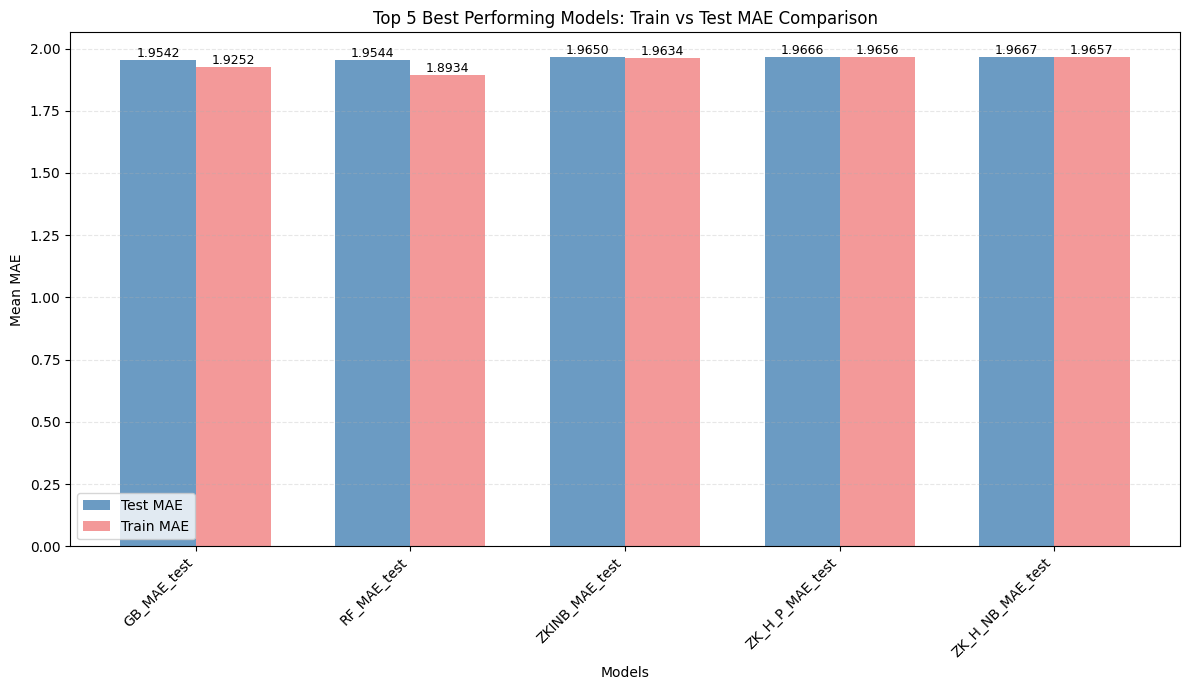


Top 5 models (lowest Test MAE):

Model		Test MAE	Train MAE	Difference (Test-Train)
------------------------------------------------------------
GB_MAE_test	1.9542		1.9252		0.0291
RF_MAE_test	1.9544		1.8934		0.0609
ZKINB_MAE_test	1.9650		1.9634		0.0016
ZK_H_P_MAE_test	1.9666		1.9656		0.0010
ZK_H_NB_MAE_test	1.9667		1.9657		0.0010


In [120]:
import matplotlib.pyplot as plt
import numpy as np

# First, let's inspect your DataFrame to understand the structure
print("DataFrame columns:")
print(results_df.columns.tolist())
print("\nDataFrame head:")
print(results_df.head())

# Let's also check what mae and mae_train variables contain
print(f"\nmae variable: {mae}")
print(f"mae_train variable: {mae_train}")

# If you're getting KeyError, try these alternatives:

# Option 1: Check if columns contain 'MAE' (case insensitive)
mae_cols = [col for col in results_df.columns if 'MAE' in col.upper() and 'TEST' in col.upper()]
train_mae_cols = [col for col in results_df.columns if 'MAE' in col.upper() and ('TRAIN' in col.upper() or 'VAL' in col.upper())]

print(f"\nTest MAE columns found: {mae_cols}")
print(f"Train MAE columns found: {train_mae_cols}")

# Option 2: Use actual column names from your DataFrame
# Get all columns that contain 'MAE' (assuming these are your metric columns)
all_mae_cols = [col for col in results_df.columns if 'MAE' in col]

# Separate test and train columns based on naming convention
test_mae_cols = [col for col in all_mae_cols if '_test' in col.lower() or 'test' in col.lower()]
train_mae_cols = [col for col in all_mae_cols if '_train' in col.lower() or 'train' in col.lower() or '_val' in col.lower()]

print(f"\nTest columns identified: {test_mae_cols}")
print(f"Train columns identified: {train_mae_cols}")

# Proceed with the visualization using the identified columns
if test_mae_cols and train_mae_cols:
    # Calculate mean values
    sorted_means_test = results_df[test_mae_cols].mean().sort_values()
    sorted_means_train = results_df[train_mae_cols].mean().sort_values()
    
    # Get the top 5 best (lowest MAE) models based on test MAE
    top_5_models = sorted_means_test.head(5).index
    top_5_test = sorted_means_test[top_5_models]
    
    # Get corresponding train values (need to match model names)
    # This assumes train columns have similar names but with 'train' instead of 'test'
    top_5_train = []
    for model in top_5_models:
        # Try to find matching train column
        train_col = model.replace('_test', '_train').replace('_TEST', '_TRAIN')
        if train_col in sorted_means_train.index:
            top_5_train.append(sorted_means_train[train_col])
        else:
            # Try alternative naming
            train_col = model.replace('test', 'train').replace('TEST', 'TRAIN')
            top_5_train.append(sorted_means_train.get(train_col, np.nan))
    
    top_5_train = pd.Series(top_5_train, index=top_5_models)
    
    # Create bar plot
    plt.figure(figsize=(12, 7))
    
    # Set positions for bars
    x = np.arange(len(top_5_models))
    width = 0.35
    
    # Create bars
    bars_test = plt.bar(x - width/2, top_5_test.values, width, 
                       label='Test MAE', color='steelblue', alpha=0.8)
    bars_train = plt.bar(x + width/2, top_5_train.values, width, 
                        label='Train MAE', color='lightcoral', alpha=0.8)
    
    plt.xlabel('Models')
    plt.ylabel('Mean MAE')
    plt.title('Top 5 Best Performing Models: Train vs Test MAE Comparison')
    plt.xticks(x, top_5_models, rotation=45, ha='right')
    plt.legend()
    
    # Add value labels on top of bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            if not np.isnan(height):
                plt.text(bar.get_x() + bar.get_width()/2., height,
                         f'{height:.4f}', ha='center', va='bottom', fontsize=9)
    
    add_value_labels(bars_test)
    add_value_labels(bars_train)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Print the results
    print("\n" + "="*60)
    print("Top 5 models (lowest Test MAE):")
    print("\nModel\t\tTest MAE\tTrain MAE\tDifference (Test-Train)")
    print("-" * 60)
    for model in top_5_models:
        test_mae = top_5_test[model]
        train_mae = top_5_train[model]
        if not np.isnan(train_mae):
            diff = test_mae - train_mae
            print(f"{model}\t{test_mae:.4f}\t\t{train_mae:.4f}\t\t{diff:.4f}")
        else:
            print(f"{model}\t{test_mae:.4f}\t\tN/A\t\tN/A")

# Alternative if you have a different DataFrame structure
else:
    print("\n" + "="*60)
    print("Alternative approach - checking DataFrame structure...")
    
    # Show the mean of all numeric columns
    print("\nMean values of all columns:")
    print(results_df.mean().sort_values())
    
    # If your DataFrame has a multi-index or different structure
    # Let's check the shape and dtypes
    print(f"\nDataFrame shape: {results_df.shape}")
    print(f"\nDataFrame info:")
    print(results_df.info())